# Traitement de signal
## Atelier \#2 : Convolution 1D
### Support de cours disponible à l'adresse : [https://www.github.com/a-mhamdi/shelf_textbook](https://www.github.com/a-mhamdi/shelf_textbook)

---

Nous rappelons que le résultat $y$ d'un produit de convolution $u\ast h \,=\, h\ast u$ entre deux signaux $u$ et $h$, est défini par la formule :
$$
y(t) \;=\; \displaystyle\int_{0}^{t}h(t-\varsigma)u(\varsigma)d\varsigma
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
def G_tau(t, tau=0):
    return ( t >= tau ).astype(int)

In [3]:
def r_tau(t, tau=0):
    return ( t >= tau ).astype(int)*(t-tau)

In [4]:
Ts = .01 # Période d'échantillonnage

Soit un système LCIT, dont la réponse impulsionnelle est : 
$$h(t) \;=\; \Gamma(t)-\Gamma_1(t)$$

In [5]:
t_h = np.arange(-.3, 2, Ts)
h = G_tau(t_h) - G_tau(t_h, 1)

Text(0.5, 0, '$t$ (sec)')

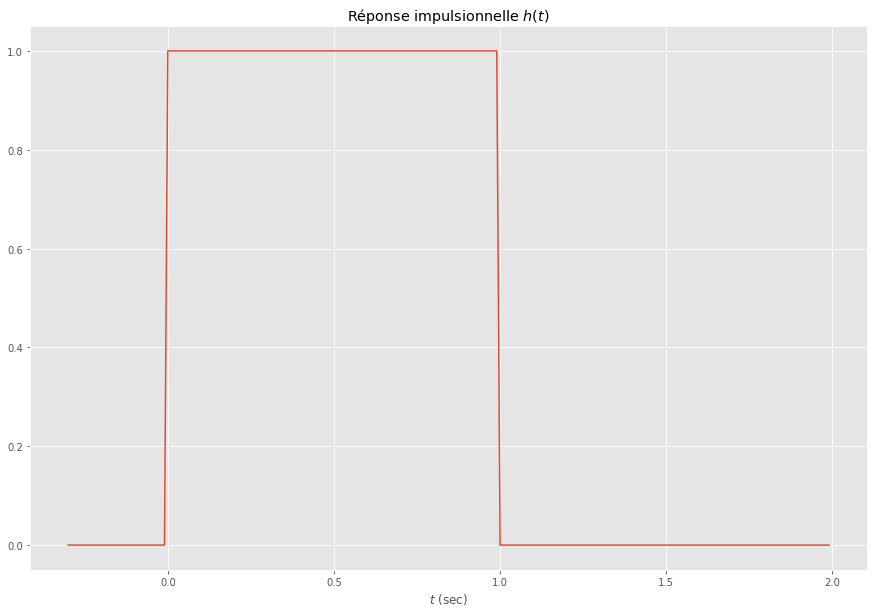

In [6]:
plt.plot(t_h, h)
plt.title("Réponse impulsionnelle $h(t)$")
plt.xlabel("$t$ (sec)")

On applique à l'entrée du système la fonction $u$ suivante :
$$ u(t)\;=\; \Gamma_2(t)-\Gamma_4(t) $$

In [7]:
t_u = np.arange(-.2, 5, Ts)
u =  G_tau(t_u, 2) - G_tau(t_u, 4)

Text(0.5, 0, '$t$ (sec)')

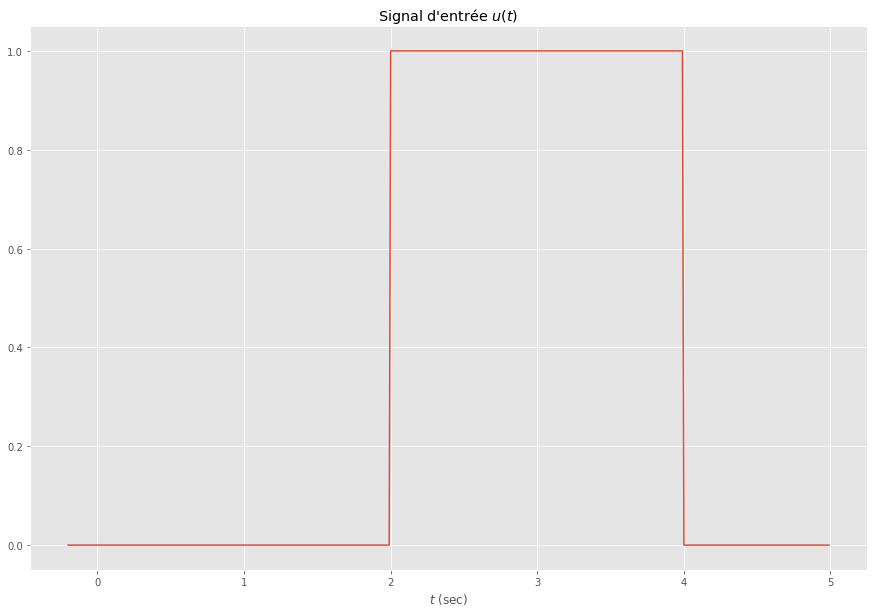

In [8]:
plt.plot(t_u, u)
plt.title("Signal d'entrée $u(t)$")
plt.xlabel("$t$ (sec)")

Observons que $h$ et $u$ n'ont pas la même taille.

In [9]:
print(type(h), h.shape)
print(type(u), u.shape)

<class 'numpy.ndarray'> (230,)
<class 'numpy.ndarray'> (520,)


On dénote par `y_sim` le résultat de la convolution numérique entre $u$ et $h$.

In [10]:
y_sim = np.convolve(u, h)/h.sum()
t_y = np.arange(-.5, len(y_sim)*Ts-.5, Ts)

La réponse du système est donnée par :
$$ y(t) \;=\; u(t)\ast h(t)$$
Soit encore :
$$y(t) \;=\; \left( \Gamma_2-\Gamma_4\right)\ast\left( \Gamma-\Gamma_1\right)$$
La réponse théorique finale est donnée par :
$$y(t) \;=\; r_2(t)-r_3(t)-r_4(t)+r_5(t)$$

In [11]:
y = r_tau(t_y, 2)-r_tau(t_y, 3)-r_tau(t_y, 4)+r_tau(t_y, 5)

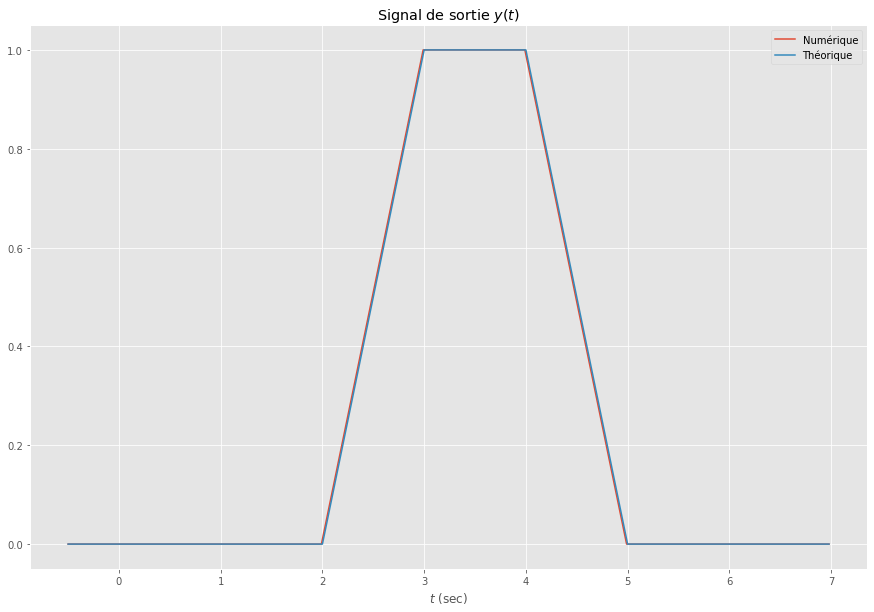

In [12]:
plt.plot(t_y, y_sim, label='Numérique')
plt.plot( t_y, y, label='Théorique')
plt.title("Signal de sortie $y(t)$")
plt.xlabel("$t$ (sec)")
plt.legend()